## Аналитика в Афише

### Оглавление

#### Продукт:
-Сколько людей пользуются в день, неделю, месяц?

-Сколько сессий в день?

-Сколько длится одна сессия?

-Как часто люди возвращаются?

#### Продажи:

-Когда люди начинают покупать?

-Сколько раз покупают за период?

-Какой средний чек?

-Сколько денег приносят? (LTV)

#### Маркетинг:
-Сколько денег потратили? Всего / на каждый источник / по времени

-Сколько стоило привлечение одного покупателя из каждого источника?

-На сколько окупились расходы? (ROI)

#### Общий вывод

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [65]:
costs.head(3)


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53


In [66]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [67]:
#приведем данные к нужному формату

costs['dt'] = pd.to_datetime(costs['dt'])

In [68]:
orders_log.head(3)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


In [69]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [70]:
#приведем данные к нужному формату и поменяем название столбца

orders_log['Buy Ts'] = pd.to_datetime(orders_log['Buy Ts'])
orders_log.rename(columns={'Buy Ts': 'buy_ts', 'Revenue': 'revenue', 'Uid': 'uid'}, inplace=True)

In [71]:
visits_log.head(3)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


In [72]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [73]:
#приведем данные к нужному формату и поменяем название столбца

visits_log.rename(columns={'Start Ts': 'start_ts', 'Device': 'device', 'Uid': 'uid', 'End Ts': 'end_ts','Source Id':'source_id'}, inplace=True)

visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'])
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'])

Проверим данные на наличие дубликатов и у далим их, если они есть

In [74]:
visits_log.duplicated().sum()

0

In [75]:
orders_log.duplicated().sum()
orders_log = orders_log.drop_duplicates().reset_index(drop = True)

In [76]:
costs.duplicated().sum()

0

Продукт

Сколько людей пользуются в день, неделю, месяц?

In [77]:
# выделим дни/недели и месяца

visits_log['visit_date'] = visits_log['start_ts'].dt.date
visits_log['visit_week'] = visits_log['start_ts'].dt.week
visits_log['visit_month'] = visits_log['start_ts'].dt.month
visits_log['visit_year']  = visits_log['start_ts'].dt.year

In [78]:
visits_log

,device,end_ts,source_id,start_ts,uid,visit_date,visit_week,visit_month,visit_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,7,2017
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,1,2018
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,3,2018
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,11,2017


In [79]:
#  Сгруппируем данные по уникальным пользователям и найдём среднее

dau_total = visits_log.groupby('visit_date').agg({'uid': 'nunique'}).mean().round().astype('int')
wau_total = visits_log.groupby(['visit_year', 'visit_week']).agg({'uid': 'nunique'}).mean().round().astype('int')
mau_total = visits_log.groupby(['visit_year', 'visit_month']).agg({'uid': 'nunique'}).mean().round().astype('int')

In [80]:
print('В среднем приложением пользуется:')
print('Уникальных пользователей в день', dau_total)
print('Уникальных пользователей в неделю', wau_total)
print('Уникальных пользователей в месяц',mau_total,)

В среднем приложением пользуется:
Уникальных пользователей в день uid    908
dtype: int64
Уникальных пользователей в неделю uid    5716
dtype: int64
Уникальных пользователей в месяц uid    23228
dtype: int64


In [81]:
dau_device =visits_log.groupby(['visit_date', 'device']).agg({'uid': 'nunique'}).reset_index()
dau_device.groupby('device')['uid'].mean().round()

device
desktop    659.0
touch      253.0
Name: uid, dtype: float64

In [82]:
wau_device =visits_log.groupby(['visit_year','visit_week','device']).agg({'uid': 'nunique'}).reset_index()
wau_device.groupby('device')['uid'].mean().round()

device
desktop    4130.0
touch      1635.0
Name: uid, dtype: float64

In [83]:
mau_device =visits_log.groupby(['visit_year', 'visit_month','device']).agg({'uid': 'nunique'}).reset_index()
mau_device.groupby('device')['uid'].mean().round()

device
desktop    16725.0
touch       6826.0
Name: uid, dtype: float64

После анализа видим, что в среднем приложением пользуются 23 228 уникальных пользователей в месяц,  5 716 пользователей в недеолю и 908 в день. В разбивке по устройствам, с которых заходят на сайт можно с уверенностью сказать что в основном пользователям удобней заходить с компьютера / ноутбука. 

Сколько сессий в день?

In [84]:
session_per_user = visits_log.groupby(['visit_date', 'device']).agg({'uid': ['count', 'nunique']}).reset_index()
session_per_user.columns = ['visit_date', 'device', 'session_count', 'user_count']
session_per_user

session_desktop = session_per_user.loc[session_per_user['device'] =='desktop']
# session_per_user ['session_per_user'] = session_per_user['n_sessions'] / session_per_user['n_users']

In [85]:
session_desktop['session_per_user'] = session_desktop['session_count'] / session_desktop['user_count']
session_desktop['session_per_user'].mean().round(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1.09

In [86]:
session_touch = session_per_user.loc[session_per_user['device'] =='touch']
session_touch['session_per_user'] = session_touch['session_count'] / session_touch['user_count']
session_touch['session_per_user'].mean().round(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1.05

In [87]:
session_touch['session_per_user'].mean().round(2)

1.05

В среднем количество пользовательских сессий в день одинаково, как с компьютера так и с телефона

Сколько длится одна сессия?

In [88]:
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'], format ='%Y-%m-%d %H:%M')
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'], format ='%Y-%m-%d %H:%M')

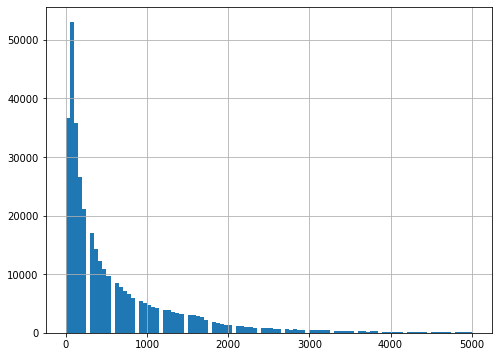

In [89]:
# посчитаем среднюю продолжительность сессии и вычислим значение по среднему значению и по моде
visits_log['session_duration_sec'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds
visits_log['session_duration_sec'].hist(figsize=(8,6),bins=100, range=(0,5000), grid=True);

In [90]:
print('Средняя продолжительность сессии:', visits_log['session_duration_sec'].mean().round(2))
print('Значени по моде:', visits_log['session_duration_sec'].mode())

Средняя продолжительность сессии: 643.51
Значени по моде: 0    60
dtype: int64


In [91]:
desktop_session_mean = visits_log.query('device == "desktop"')['session_duration_sec'].mean()
desktop_session_mode = visits_log.query('device == "desktop"')['session_duration_sec'].mode()

In [92]:
# найдем среднюю продолжительность сессий с компьютера
desktop_session_mean.round(2)

703.95

In [93]:
# найдем значение по моде сессий с компьютера
desktop_session_mode

0    60
dtype: int64

In [94]:
touch_session_mean = visits_log.query('device == "touch"')['session_duration_sec'].mean()
touch_session_mode = visits_log.query('device == "touch"')['session_duration_sec'].mode()

In [95]:
touch_session_mean.round(2)

479.62

In [96]:
touch_session_mode

0    60
dtype: int64

Средняя продолжительность сессии составляет 643 секунды. Это значение включает в себя в том числе и выдающиеся значения, поэтому для более корректного представления найдем среднее значение по моде, которое равно 60 секундам. 
В разбивке по устройствам средняя продолжительность сессии у тех кто заходит с помощью компьютера больше, но значения по моде у обоих устройств одинаковое. 
Отсюда можем сделать вывод, что сессия продолжительностью 60 секунд является самой часто встречающейся у пользователей

Как часто люди возвращаются?

In [97]:
# определим месяц, когда пользователь впервые воспользовался приложением 

first_active_month = visits_log.groupby(['uid'])['start_ts'].min()
first_active_month.name = 'first_visit_month'
visits_log = visits_log.join(first_active_month, on='uid')

visits_log['first_visit_month'] = visits_log['first_visit_month'].astype('datetime64[M]')

In [98]:
# Теперь для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты

visits_log ['cohort_lifetime'] = visits_log['start_ts'] - visits_log['first_visit_month']
visits_log['cohort_lifetime'] = (visits_log['cohort_lifetime'] / np.timedelta64(1,'M')).astype('int')

In [99]:
# Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей

cohorts = visits_log.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

In [100]:
# Найдём исходное количество пользователей в когорте

initial_users = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_users = initial_users.rename(columns={'uid':'cohort_users'})

In [101]:
# Объединим данные по когортам с исходным количеством пользователей в когорте
cohorts = cohorts.merge(initial_users,on='first_visit_month')

In [102]:
# рассчитаем Retention Rate
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

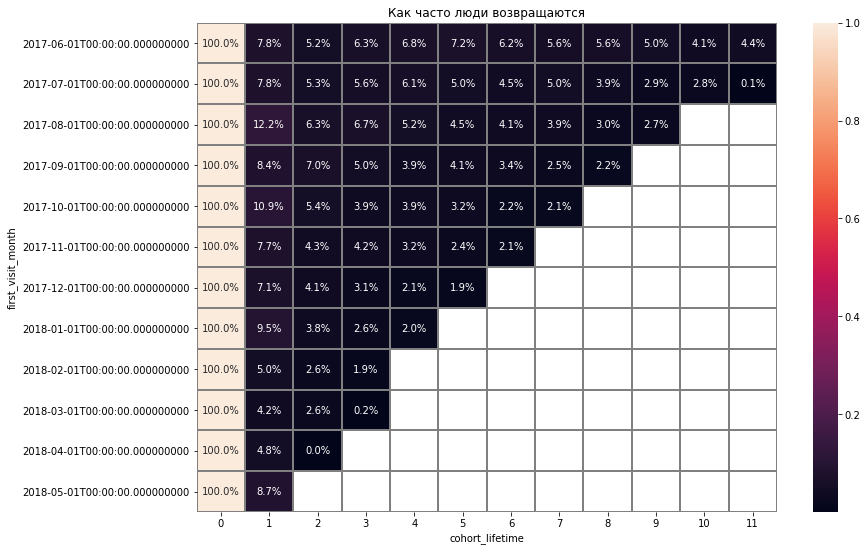

In [103]:
# Построим сводную таблицу и создадим тепловую карту

retention_cohorts = cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='retention', aggfunc='sum')
plt.figure(figsize=(13, 9))
plt.title('Как часто люди возвращаются')
sns.heatmap(retention_cohorts, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

Вывод: по тепловой карте, видим что процент вернувшихся людей падает после первого месяца использования приложения, но в последющие месяца остается примерно на таком же уровне. Из чего мы можем сделать вывод, что большая часть пользователей перестают использование приложения после первого месяца, те пользователи которые остались активными еще на 3-4 месяца, в зависимости от когорты. Процент вернувшихся людей падает до 1-2% в большинстве когорт к последнему месяцу. 

Общий вывод по разделу: По итогам раздела определили количество пользователей которые пользуются приложением в день / неделю и месяц. Срелнее число сессий равно 1,28 и самое часто значение по моде продолжительности сессий составлчет 60 секунд. Количество вернувшихся пользователей сокращается после первого месяца, но потом в рамках когорт остаются примерно на том же уровне. 

Продажи

Когда люди начинают покупать

In [104]:
# Переведем данные к нужному формату и по каждому пользователю выделим месяц первой покупки

orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'])
first_order = orders_log.groupby(['uid'])['buy_ts'].min()
first_order.name = 'first_order_month'

In [105]:
visits_log = visits_log.join(first_order, on='uid')

In [106]:
visits_log['first_order_month'] = visits_log['first_order_month'].astype('datetime64[M]')

In [107]:
visits_log.pivot_table(index= 'first_visit_month', columns='first_order_month', values='uid', aggfunc='nunique').fillna('')

first_order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_visit_month,,,,,,,,,,,,,
2017-06-01,2023,170,67,107,119,92,78,59,64,64,26,54.0,
2017-07-01,,1753,95,99,100,89,77,67,62,50,33,33.0,
2017-08-01,,,1208,118,92,73,65,38,39,38,25,25.0,
2017-09-01,,,,2257,268,143,102,59,76,71,40,42.0,
2017-10-01,,,,,3761,327,178,114,97,92,49,60.0,
2017-11-01,,,,,,3357,392,155,102,127,64,65.0,
2017-12-01,,,,,,,3491,237,115,112,45,74.0,
2018-01-01,,,,,,,,2644,244,114,50,67.0,
2018-02-01,,,,,,,,,2852,202,62,70.0,


Вывод: по свобной таблице можем сделать вывод, что в большинстве случаев пользователи начинают покупать в первый месяц пользования приложением. В последующие месяца показатель сильно падает  

Сколько раз покупают за период

In [108]:
orders_log = orders_log.join(first_order, on='uid')

In [109]:
orders_log['buy_ts'] = orders_log['buy_ts'].astype('datetime64[M]')
orders_log['first_order_month'] = orders_log['first_order_month'].astype('datetime64[M]')

In [110]:
orders_log.pivot_table(index='first_order_month',
    columns='buy_ts',
    values='uid',
    aggfunc='nunique').fillna('')

buy_ts,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2023,61,50,54,88,67,62,47,58,45,45,53,
2017-07-01,,1923,52,57,64,49,38,36,39,42,22,26,
2017-08-01,,,1370,58,53,44,40,32,30,44,19,31,
2017-09-01,,,,2581,130,100,74,52,64,66,37,43,
2017-10-01,,,,,4340,206,123,92,93,72,56,67,
2017-11-01,,,,,,4081,222,120,106,81,48,62,
2017-12-01,,,,,,,4383,146,103,97,50,63,
2018-01-01,,,,,,,,3373,114,83,43,45,
2018-02-01,,,,,,,,,3651,118,58,39,


Вывод: После первого месяца количество покупателей в каждой когорте сильно подает и в рамках одной когорты остатеся примерно на одинаковом уровне. 

Какой средний чек?

In [111]:
# сгруппируем данные по когорте first_order_month и месяцу совершения заказа order_month:

orders_group = orders_log.groupby(['first_order_month', 'buy_ts']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()

In [112]:
# orders_group

In [113]:
# Найдём средний чек покупателя

orders_group['revenue_per_user'] = orders_group['revenue'] / orders_group['uid']

In [114]:
revenue_per_user = orders_group.pivot_table(index='first_order_month',values='revenue_per_user',aggfunc='mean').fillna('').reset_index()

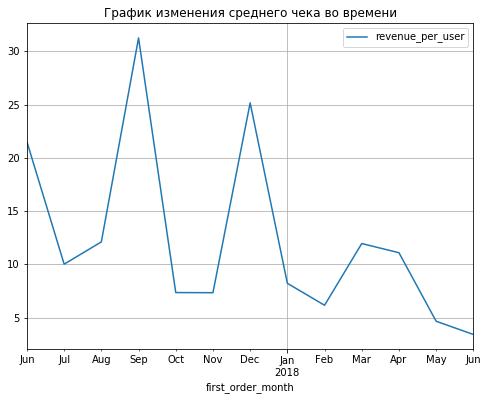

In [115]:
revenue_per_user.plot(x='first_order_month', y='revenue_per_user', grid=True, figsize=(8,6))
plt.title('График изменения среднего чека во времени');

In [116]:
# Построим сводную таблицу изменения среднего чека в когортах по месяцу 

orders_group.pivot_table(index='first_order_month',columns='buy_ts',values='revenue_per_user',aggfunc='mean').fillna('')

buy_ts,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.72441,16.0954,17.7068,35.7648,23.5066,22.2078,31.0119,25.0332,19.2957,27.2336,25.6813,9.80415,
2017-07-01,,6.01022,12.3963,21.036,10.7861,6.93816,7.89684,6.42111,6.99282,7.38214,12.8618,11.5138,
2017-08-01,,,5.27652,11.1488,11.8513,12.183,16.9212,12.1391,9.62033,12.6105,21.07,8.30742,
2017-09-01,,,,5.64453,22.1884,13.4452,138.669,19.8815,26.095,27.4371,16.9614,11.0447,
2017-10-01,,,,,5.00373,11.2874,6.75325,7.41315,7.0728,7.25514,6.57321,7.4797,
2017-11-01,,,,,,5.15468,7.33905,6.78658,12.5107,7.45728,4.58083,7.56484,
2017-12-01,,,,,,,4.73819,7.81658,39.366,48.1351,27.4314,23.5184,
2018-01-01,,,,,,,,4.13564,8.72123,12.3655,11.1998,4.69956,
2018-02-01,,,,,,,,,4.15699,8.61,4.94241,6.94103,


In [117]:
# Найдём lifetime когорты

orders_group = orders_group.reset_index()
orders_group['cohort_lifetime'] = orders_group['buy_ts'] - orders_group['first_order_month']

In [118]:
# Преобразуем этот тип в число месяцев, прошедших между датами

orders_group['cohort_lifetime'] = orders_group['cohort_lifetime'] / np.timedelta64(1,'M')

In [119]:
orders_group['cohort_lifetime'] = orders_group['cohort_lifetime'].round().astype('int')

In [120]:
# оставим в обозначении когорты только год и месяц

orders_group['first_order_month'] = orders_group['first_order_month'].dt.strftime('%d.%m.%Y')

In [121]:
# Построим сводную таблицу изменения среднего чека

revenue_per_user = orders_group.pivot_table(index='first_order_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean')

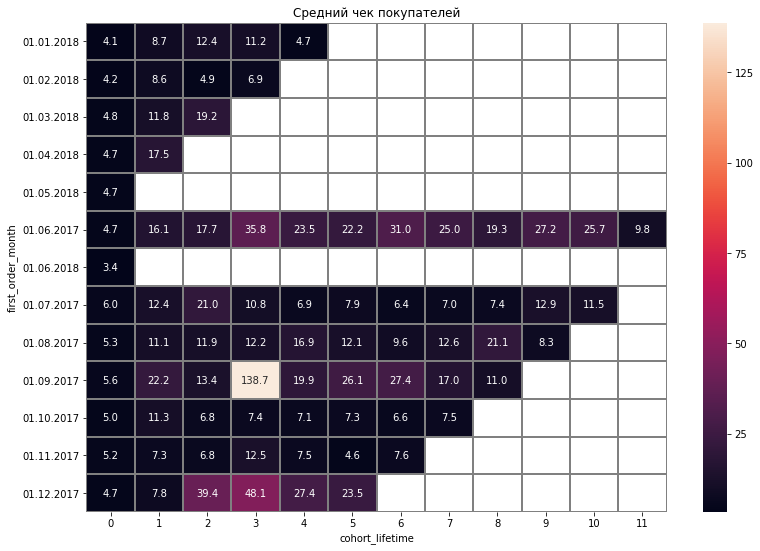

In [122]:
plt.figure(figsize=(13, 9))
plt.title('Средний чек покупателей')
sns.heatmap(revenue_per_user, annot=True, fmt='.1f', linewidths=1, linecolor='gray');

Вывод: Для всех когорт в первый месяц уровень среднего чека приерно одинаковый. Так же во всех когортах средний чек поднимается на 2 и практически всегда на 3 месяц. У некоторых когорт наблюдается резкий рост среднего чека в одном месяце, после чего такой же резкий спад примерно до прошлого уровня (когорта от 01/09/2017). В целом средний чек во всех когортах увеличивается. Даже если в какой-то момнт показатель проваливается, потом все равно начинается рост. Падение среднего чека в последний период наблюдается у 10 когорт из 13. 

Сколько денег приносят? (LTV)

Добавим месяц первого посещения сайта

In [123]:
orders_log = orders_log.merge(first_active_month, on='uid')

In [124]:
orders_log.rename(columns={'first_visit_month_y': 'first_visit_month'}, inplace=True)

In [125]:
orders_log['first_visit_month'] = orders_log['first_visit_month'].astype('datetime64[M]')

Добавим данные о количестве уникальных пользователей по месяцу первого посещения сайта и после добавим сгруппированные данные в датафрейм с заказами

In [126]:
cohort_sizes = orders_log.groupby('first_visit_month')['uid'].nunique()
cohort_sizes

first_visit_month
2017-06-01    2923
2017-07-01    2458
2017-08-01    1721
2017-09-01    3058
2017-10-01    4678
2017-11-01    4262
2017-12-01    4074
2018-01-01    3119
2018-02-01    3186
2018-03-01    2838
2018-04-01    1890
2018-05-01    2316
Name: uid, dtype: int64

In [127]:
orders_log = orders_log.merge(cohort_sizes, on='first_visit_month')

In [128]:
orders_log.rename(columns={'uid_x': 'uid', 'uid_y': 'cohort_size'}, inplace=True)

Объединим данные с двух датафремов

In [129]:
data = visits_log.groupby(['start_ts', 'source_id', 'device', 'uid']).agg({'start_ts': 'min'})

In [130]:
data['start_ts'] = data['start_ts'].astype('datetime64[M]')
data.rename(columns={'start_ts': 'start'}, inplace=True)

In [131]:
data = data.reset_index()

In [132]:
data = data.merge(orders_log, on='uid')

Посчитаем lifetime для каждого пользователя

In [153]:
data['age'] = ((data['buy_ts'] - data['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')

Приведем данные к помесячным показателям

In [154]:
monthly_data = (data
    .groupby(['first_visit_month', 'first_order_month', 'device', 'source_id','age'])
    .agg({'cohort_size': 'mean', 'uid':['count', 'nunique'], 'revenue':'sum'})
    )
monthly_data.columns = ['cohort_size', 'orders_count', 'uid_count', 'revenue']
monthly_data = monthly_data.reset_index()

Распределим данные о заказах по когортам без учета данных об устройстве и источниках рекламы

In [155]:
orders_cohorts = (monthly_data
                 .groupby(['first_visit_month', 'first_order_month', 'age'])
                 .agg({'cohort_size': 'mean', 'orders_count':'sum', 'revenue': 'sum', 'uid_count':'sum'})
                 .reset_index()
                 )
orders_cohorts.head(3)

,first_visit_month,first_order_month,age,cohort_size,orders_count,revenue,uid_count
0,2017-06-01,2017-06-01,0,2923,25839,148121.29,3388
1,2017-06-01,2017-06-01,1,2923,25677,155869.55,207
2,2017-06-01,2017-06-01,2,2923,25127,114898.83,193


Расчитаем ltv на одного покупателя когорты в месяц

In [156]:
orders_cohorts['ltv'] = (orders_cohorts['revenue'] / orders_cohorts['cohort_size']).round(2)

Построим сводную таблицу и сделаем тепловую карту 

In [157]:
ltv_cohorts = orders_cohorts.pivot_table(index='first_visit_month',columns='age',values= 'ltv',aggfunc='mean')
ltv_cohorts = ltv_cohorts.cumsum(axis=1).round(2)

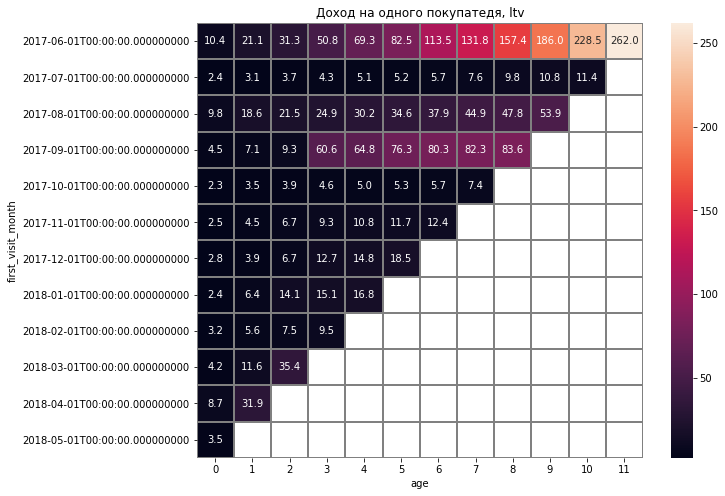

In [158]:
plt.figure(figsize=(10,8))
plt.title('Доход на одного покупатедя, ltv')
sns.heatmap(ltv_cohorts, annot=True, fmt='.1f', linewidths=1, linecolor='gray');

In [139]:
# Посчитаем итоговый LTV когорт

ltv_cohorts_all = (ltv_cohorts.sum(axis=1)).round(2)
ltv_cohorts_all

first_visit_month
2017-06-01    1424.37
2017-07-01      70.35
2017-08-01     348.31
2017-09-01     424.44
2017-10-01      34.97
2017-11-01      52.61
2017-12-01      50.56
2018-01-01      40.63
2018-02-01      19.33
2018-03-01      65.99
2018-04-01      20.34
2018-05-01       3.46
dtype: float64

In [140]:
# Посчитаем средний LVT когорт

ltv_cohorts_all.mean().round(2)

212.95

Посчитаем средний LTV для разных источников

In [141]:
monthly_data['ltv'] = (monthly_data['revenue'] / monthly_data['cohort_size']).round(2)

In [142]:
source_ltv = monthly_data.groupby('source_id')['ltv'].mean().round(2)
source_ltv.columns = ['source_id', 'ltv']
source_ltv.sort_values(ascending=False)

source_id
2     1.85
1     1.80
5     0.94
4     0.34
3     0.21
9     0.03
10    0.02
7     0.00
Name: ltv, dtype: float64

Вывод: Больше всего прибыли приносят пользователи первой когорты, далее показатель  падает и в дальнейшем значительный рост дохода не наблюдается ни у одной когорты. В разрезе источников рекламы больше всего прибыли на привлеченного пользователя компания получает с 2,1 и 5 источников. 7 и 10 источник рекламы не приносит практически никакой прибыли

Общий вывод по разделу: По итогам раздела можно сделать вывод, что в основном пользователи пользуются активно приложением в первый месяц. Так же очень небольшое число людей продолжает покупать в дальнейшие месяца. По прошествия времени размер среднего цека увеличивается для разных когорт. Прибыль с обдного пользователя достигает наибольшего размера в первой когорте, далее идет ощутимый спад и далее этот показатель не меняется сильно в разрезе когорт. 

Маркетинг

Сколько денег потратили? Всего / на каждый источник / по времени

In [143]:
costs_total = costs['costs'].sum().round()
print('Всего потратила денег:', costs_total)

Всего потратила денег: 329132.0


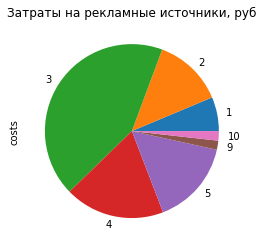

In [190]:
costs_source = costs.groupby('source_id')['costs'].sum().round()
plt.title('Затраты на рекламные источники, руб')
costs_source.plot(kind='pie');

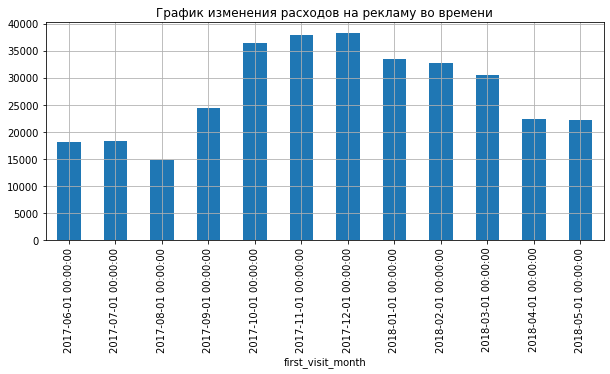

In [188]:
costs['first_visit_month'] = costs['first_visit_month'].astype('datetime64[M]')
costs_date = costs.groupby('first_visit_month')['costs'].sum().round()
costs_date.plot(kind= 'bar', figsize=(10, 4), grid=True)
plt.title('График изменения расходов на рекламу во времени');

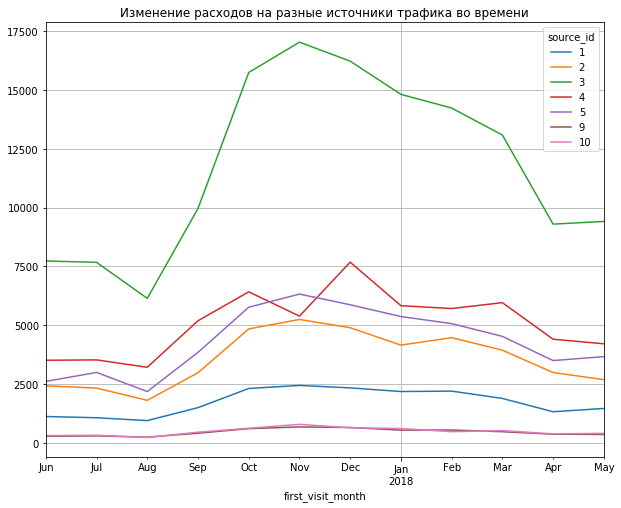

In [176]:
costs_sum = costs.pivot_table(index='first_visit_month', columns='source_id', values='costs', aggfunc='sum').plot(figsize=(10,8), grid=True)
plt.title('Изменение расходов на разные источники трафика во времени');

Вывод: Всего компания потратила на маркетинг почти 330 тысяч. Больше всего расходов потребовалось для продвижения рекламы через 3 рекламный источник. За ним с отставанием в 2-3 раза идут рекламные источники 4 и 5. В разрезе каждого источника индивидуально наблюдаем что с августа 2017 по март 2018 денег на рекламу тратили больше всего. До и после этого периода наблюдается планомерный спад

Сколько стоило привлечение одного покупателя из каждого источника?

In [146]:
costs.rename(columns= ({'dt': 'first_visit_month'}), inplace=True)

Объединим данные для расчета затрат по привлечение из разных источников

In [147]:
total= pd.merge(monthly_data, costs, on=['source_id','first_visit_month'])

Посчитаем затраты для привлечения одного пользователя для каждого источника

In [148]:
total['cac'] = total['costs'] / total['uid_count']

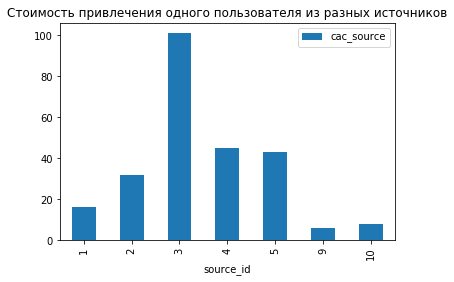

In [149]:
total_cac = (total.groupby('source_id').agg({'cac':'mean'})).round().reset_index()
total_cac.columns =['source_id', 'cac_source']
total_cac.plot(x='source_id', y='cac_source', kind='bar')
plt.title('Стоимость привлечения одного пользователя из разных источников');

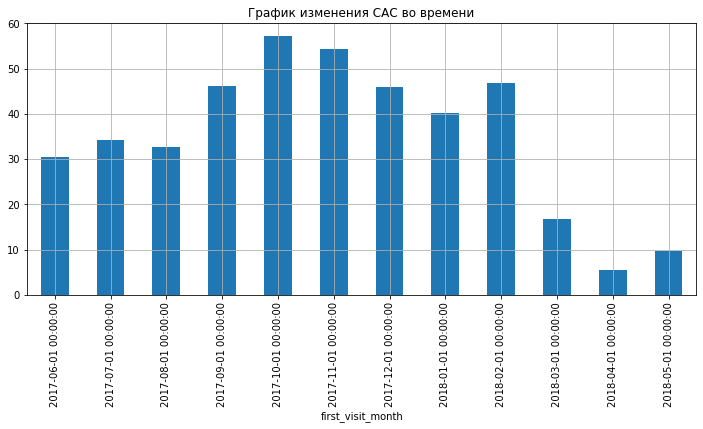

In [186]:
total_cac = total.groupby('first_visit_month')['cac'].mean().round(2)
total_cac.plot(kind= 'bar', figsize=(12, 5), grid=True)
plt.title('График изменения САС во времени');

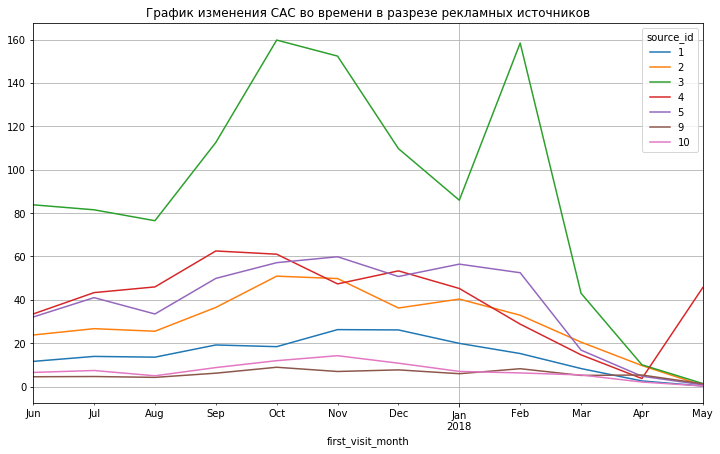

In [185]:
total.pivot_table(index='first_visit_month', columns='source_id', values='cac', aggfunc='mean').plot(figsize=(12,7), grid=True)
plt.title('График изменения САС во времени в разрезе рекламных источников');

Вывод: Дороже всего привлечение одного пользователся стоило привлечь из 3 источника рекламы. Далее  идут 4 и 5 источник. Самый выгодный источник рекламы с точки зрения потраченых денег получился 9 источник ( если не считать органического трафика у источников 6 и 7, по которым нет затрат но мы знаем что небольшое количество пользователей из них пришли). В октябре 2017 года затраты на привлечение одного пользователя были самые большие за весб анализируемый период, в то время как в апреле 2018 года эти затраты были самыми минимальными.

На сколько окупились расходы? (ROI)

Посчитаем окупаемость инвестиций 

In [150]:
total['romi'] = total['ltv'] / total['cac']

In [151]:
total

,first_visit_month,first_order_month,device,source_id,age,cohort_size,orders_count,uid_count,revenue,ltv,costs,cac,romi
0,2017-06-01,2017-06-01,desktop,1,0,2923,18915,339,123226.86,42.16,75.20,0.221829,190.056383
1,2017-06-01,2017-06-01,desktop,1,0,2923,18915,339,123226.86,42.16,62.25,0.183628,229.594217
2,2017-06-01,2017-06-01,desktop,1,0,2923,18915,339,123226.86,42.16,36.53,0.107758,391.246647
3,2017-06-01,2017-06-01,desktop,1,0,2923,18915,339,123226.86,42.16,55.00,0.162242,259.858909
4,2017-06-01,2017-06-01,desktop,1,0,2923,18915,339,123226.86,42.16,57.08,0.168378,250.389629
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92960,2018-05-01,2018-05-01,touch,10,0,2316,28,28,64.46,0.03,9.92,0.354286,0.084677
92961,2018-05-01,2018-05-01,touch,10,0,2316,28,28,64.46,0.03,21.26,0.759286,0.039511
92962,2018-05-01,2018-05-01,touch,10,0,2316,28,28,64.46,0.03,11.32,0.404286,0.074205
92963,2018-05-01,2018-05-01,touch,10,0,2316,28,28,64.46,0.03,33.15,1.183929,0.025339


In [152]:
romi_total =total.pivot_table(
        index='source_id', 
        columns='first_order_month',
        values='romi', 
        aggfunc='mean').round(1)

romi_total.cumsum(axis=1).round(1)


first_order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
source_id,,,,,,,,,,,,,
1,41.0,42.6,44.1,45.6,46.1,47.1,47.3,47.7,48.6,49.2,54.1,54.4,NaN
2,15.5,16.0,16.2,21.0,21.2,21.7,22.1,22.2,22.4,22.8,23.6,23.9,NaN
3,0.9,1.0,1.1,1.3,1.4,1.5,1.6,1.6,1.7,1.8,2.0,2.1,NaN
4,6.6,7.5,8.4,9.2,10.5,11.9,12.2,12.7,13.6,15.2,16.3,17.3,17.3
5,9.2,9.6,10.2,11.7,11.9,12.1,12.3,12.5,12.7,14.2,14.8,15.0,NaN
9,0.5,0.7,0.9,1.1,1.2,1.4,1.5,1.5,1.5,1.6,1.6,1.6,NaN
10,0.2,0.3,0.4,0.4,0.5,0.5,0.5,0.5,0.5,0.7,0.8,0.9,NaN


Вывод: Практически все источники трафика начинаю окупаться уже с первого месяца.Исключение составляют источники 3,9 и 10. Самый действенный источник рекламы номер 1, за ним с большим отрывом идут все остальные. Хуже всех показатели у источников номер 9, 10 и 3. 

Общий вывод: 

Маркетологам следует обратить внимание на компьютерную версию сайта, так как эта версия более популярна у пользователей, так же в среднем люди проводят больше времени на сайте именно с компьютера. Так же внимание стоит обратить на то, как удержать пользователя после первого месяца использования приложения, так как мы видим, что первые покупки и самый большой средний чек происходит в основном в первом месяце.
cac выше всего у источников 3-4-5
Больше всего затрат  так же у этих же номеров 3-4-5. Возврат инвестиций присутствует у всех источников, но более быстро происходит у номеров 1,2, 4 и 5.
Источник 1, 2 могут быть рекоммендованы как потенциально перспективные каналы продаж в совокупностью с удобным сайтом  